<a href="https://colab.research.google.com/github/Dante1902/Tort-Al/blob/main/K-pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Чтение данных из CSV файла
df = pd.read_csv('kpop_rankings.csv')

In [3]:
# Посчитайте размерность данных
print("Размерность данных:", df.shape)

# Посчитайте количество пропущенных значений в каждой переменной
print("Количество пропущенных значений:")
print(df.isnull().sum())

# Выведите типы данных каждой переменной и переконвертируйте при необходимости
print("Типы данных:")
print(df.dtypes)

Размерность данных: (66700, 6)
Количество пропущенных значений:
year          0
time          0
rank          0
song_title    0
artist        0
album         0
dtype: int64
Типы данных:
year           int64
time           int64
rank           int64
song_title    object
artist        object
album         object
dtype: object


In [4]:
# Преобразуем поле 'year' в тип данных datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Выберем песни, популярные в 2010 и 2023 годах
popular_songs_2010 = df[df['year'].dt.year == 2010]['song_title'].unique()
popular_songs_2023 = df[df['year'].dt.year == 2023]['song_title'].unique()

print("\nПесни, популярные в 2010 году:")
print(popular_songs_2010)

print("\nПесни, популярные в 2023 году:")
print(popular_songs_2023)


Песни, популярные в 2010 году:
['우리 사랑하게 됐어요.' '처음처럼 그때처럼 (Feat. 강민경)' '그대라서' ... '멍멍이' 'Everything'
 'All I Want For Christmas Is You']

Песни, популярные в 2023 году:
['Ditto' '사건의 지평선' 'OMG' 'Hype boy'
 'NOT SORRY (Feat. pH-1) (Prod. by Slom)' 'Candy' 'ANTIFRAGILE'
 'After LIKE' 'Attention' 'Nxde' '새삥 (Prod. ZICO) (Feat. 호미들)'
 '마이웨이 (MY WAY) (Prod. R.Tee)' 'LOVE DIVE' 'Monologue' '너의 모든 순간' 'Cookie'
 'Dreamers (Feat. FIFA Sound)' 'Shut Down' 'WHEN I MOVE' '사랑은 늘 도망가'
 'FEARLESS' '그대를 알고' 'Rush Hour (Feat. j-hope of BTS)' '사랑인가 봐'
 'Pink Venom' '잘가요' '해요 (2022)' '그때 그 순간 그대로 (그그그)' 'TOMBOY' '그라데이션'
 '딱 10CM만' '정이라고 하자 (Feat. 10CM)' '나의 X에게' '내가 아니라도'
 '미운오리새끼 (Feat. 선우정아, BOBBY) (Prod. R.Tee)' '자격지심 (Feat. ZICO)' '취중고백'
 '오르트구름' '눈 (EYE) (Feat. BIG Naughty, 저스디스 (JUSTHIS)) (Prod. R.Tee)'
 'ELEVEN' 'That`s Hilarious' 'Say I Love You' '다정히 내 이름을 부르면' 'Snowman'
 '첫사랑' '그댄 행복에 살텐데 (2022)' '보고싶었어' '모든 날, 모든 순간 (Every day, Every Moment)'
 'LOVE me' '눈이 오잖아 (Feat.헤이즈)' '아픈 나를' '그 겨울이 잠든 거

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

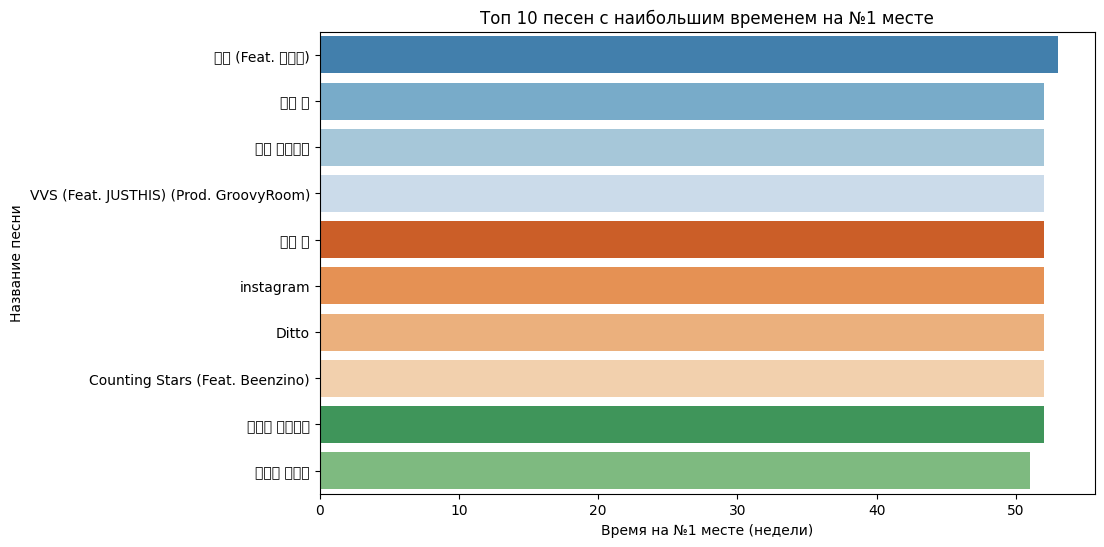

In [6]:
# Построим график с песнями, которые дольше всего были №1
max_ranked_songs = df[df['rank'] == 1].groupby('song_title')['time'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=max_ranked_songs.values, y=max_ranked_songs.index, palette='tab20c')
plt.title('Топ 10 песен с наибольшим временем на №1 месте')
plt.xlabel('Время на №1 месте (недели)')
plt.ylabel('Название песни')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

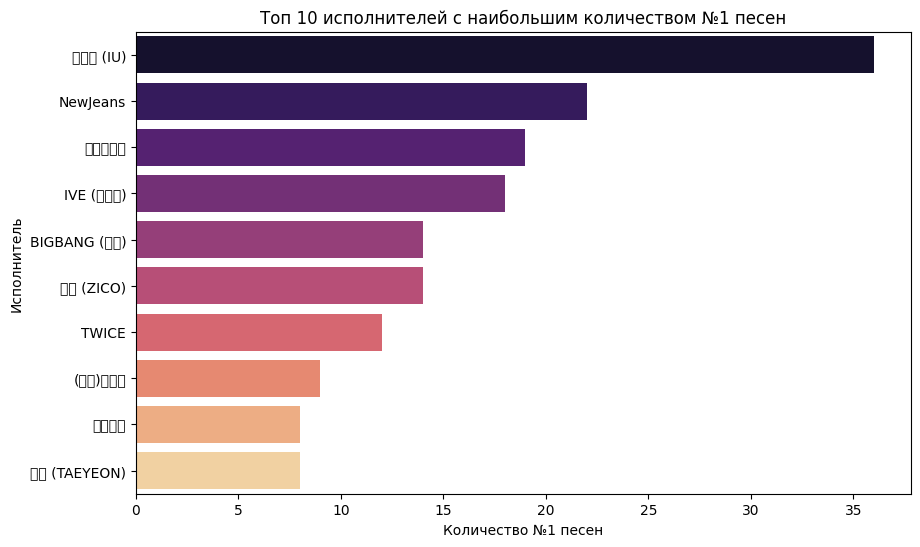

In [7]:
# Построим график по исполнителям с наибольшим количеством песен №1
top_artists = df[df['rank'] == 1]['artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Топ 10 исполнителей с наибольшим количеством №1 песен')
plt.xlabel('Количество №1 песен')
plt.ylabel('Исполнитель')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

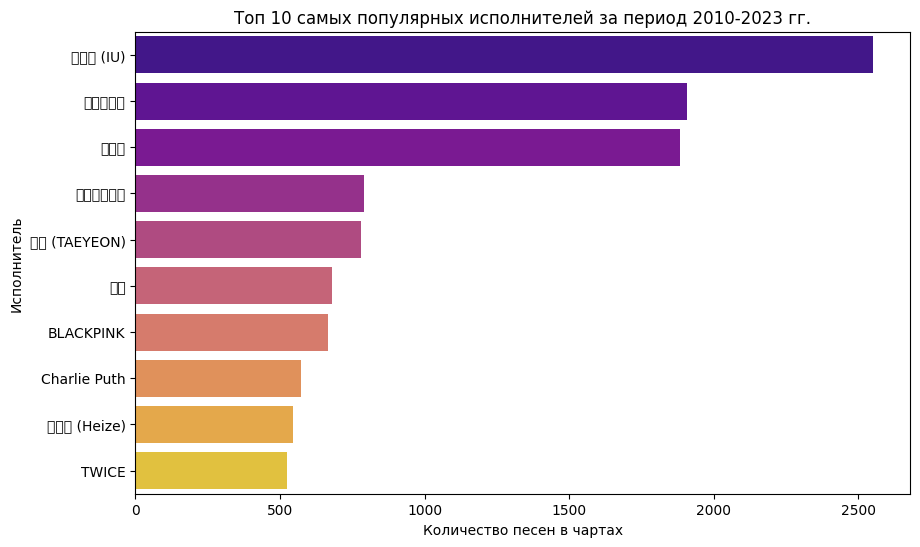

In [8]:
# Выделим самых популярных исполнителей за период 2010 по 2023 год
top_artists_overall = df.groupby('artist')['rank'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_overall.values, y=top_artists_overall.index, palette='plasma')
plt.title('Топ 10 самых популярных исполнителей за период 2010-2023 гг.')
plt.xlabel('Количество песен в чартах')
plt.ylabel('Исполнитель')
plt.show()